In [1]:
import os
%matplotlib inline

from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.core import Orbital, OrbitalType
from pymatgen.electronic_structure.dos import Dos
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen import Element, Spin

# MRSAdv-2018-3037452 - PDOS analysis

In this jupyter notebook we will extract the partial density of states from our calculations on Li2MnO3 and Li2IrO3, and analyse their profile for the MRS advances paper, as requested by referee 2. Let's start by loading the data from the vasprun.xml files:


In [2]:
Ir_vasprun_dis = Vasprun("data/li2iro3_hse_dos.xml", 
                         parse_potcar_file=False)
Ir_vasprun_chg = Vasprun("data/li0.5iro3_hse_dos.xml", 
                         parse_potcar_file=False)
Mn_vasprun_dis = Vasprun("data/li2mno3_hse_dos.xml", 
                         parse_potcar_file=False)
Mn_vasprun_chg = Vasprun("data/li0.5mno3_hse_dos.xml", 
                         parse_potcar_file=False)

Next we take the complete_dos from the discharged structure, and plot the element projected dos for the various structures:

## Element Projected
### Discharged Li2IrO3

# Prettier pictures

In [3]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
matplotlib.rcParams.update({'font.size': 14})

def smear(e, d, sigma=0.05):
    diff = [e[i + 1] - e[i] for i in range(len(e) - 1)]
    avgdiff = sum(diff) / len(diff)
    return gaussian_filter1d(d, sigma / avgdiff)

## Li2IrO3

In [4]:
Ir_d_dos_dis = Ir_vasprun_dis.complete_dos.get_element_spd_dos("Ir")[OrbitalType.d]
O_Ir_p_dos_dis = Ir_vasprun_dis.complete_dos.get_element_spd_dos("O")[OrbitalType.p]
Ir_d_dos_chg = Ir_vasprun_chg.complete_dos.get_element_spd_dos("Ir")[OrbitalType.d]
O_Ir_p_dos_chg = Ir_vasprun_chg.complete_dos.get_element_spd_dos("O")[OrbitalType.p]

In [5]:
e_Ir_dis = Ir_d_dos_dis.energies - Ir_d_dos_dis.efermi;
e_Ir_chg = Ir_d_dos_chg.energies - Ir_d_dos_chg.efermi;
dos_Ir_d_dis = Ir_d_dos_dis.densities[Spin.up];
dos_O_p_dis = O_Ir_p_dos_dis.densities[Spin.up];
dos_Ir_d_chg = Ir_d_dos_chg.densities[Spin.up];
dos_O_p_chg = O_Ir_p_dos_chg.densities[Spin.up];

In [6]:
f_Ir_d_dis = interp1d(e_Ir_dis, dos_Ir_d_dis, kind="cubic")
f_O_p_dis = interp1d(e_Ir_dis, dos_O_p_dis, kind="cubic")
f_Ir_d_chg = interp1d(e_Ir_chg, dos_Ir_d_chg, kind="cubic")
f_O_p_chg = interp1d(e_Ir_chg, dos_O_p_chg, kind="cubic")

In [7]:
new_e = np.linspace(-5, 5, 10000)
new_dos_Ir_d_dis = f_Ir_d_dis(new_e).clip(min=0)
new_dos_O_p_dis = f_O_p_dis(new_e).clip(min=0)
new_dos_Ir_d_chg = f_Ir_d_chg(new_e).clip(min=0)
new_dos_O_p_chg = f_O_p_chg(new_e).clip(min=0)

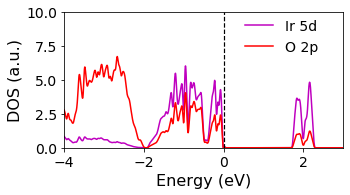

In [8]:
plt.figure(figsize=(5,3))
plt.xlim([-4, 3]); plt.ylim([-0, 10])
plt.ylabel("DOS (a.u.)", fontdict={'size': 16})
plt.xlabel("Energy (eV)", fontdict={'size': 16})
plt.plot(new_e, new_dos_Ir_d_dis, 'm')
plt.plot(new_e, new_dos_O_p_dis, 'r')
plt.plot([0, 0], [0, 10], "k--", linewidth=1.2)
plt.legend(["Ir 5d", "O 2p"], loc=(0.63, 0.65), frameon=False)
plt.gcf().subplots_adjust(bottom=0.25)
# plt.savefig("li2iro3.png", dpi=300, bbox_inches="tight")

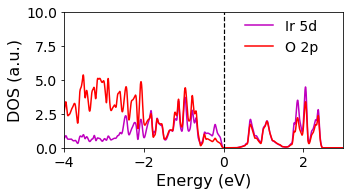

In [9]:
plt.figure(figsize=(5,3))
plt.xlim([-4, 3]); plt.ylim([-0, 10])
plt.ylabel("DOS (a.u.)", fontdict={'size': 16})
plt.xlabel("Energy (eV)", fontdict={'size': 16})
plt.plot(new_e, new_dos_Ir_d_chg, 'm')
plt.plot(new_e, new_dos_O_p_chg, 'r')
plt.plot([0, 0], [0, 10], "k--", linewidth=1.2)
plt.legend(["Ir 5d", "O 2p"], loc=(0.63, 0.65), frameon=False)
plt.gcf().subplots_adjust(bottom=0.25)
# plt.savefig("li2iro3_charged.png", dpi=300, bbox_inches="tight")

## Li2MnO3

In [10]:
Mn_d_dos_dis = Mn_vasprun_dis.complete_dos.get_element_spd_dos("Mn")[OrbitalType.d]
O_Mn_p_dos_dis = Mn_vasprun_dis.complete_dos.get_element_spd_dos("O")[OrbitalType.p]
Mn_d_dos_chg = Mn_vasprun_chg.complete_dos.get_element_spd_dos("Mn")[OrbitalType.d]
O_Mn_p_dos_chg = Mn_vasprun_chg.complete_dos.get_element_spd_dos("O")[OrbitalType.p]

In [11]:
e_Mn_dis = Mn_d_dos_dis.energies - Mn_d_dos_dis.efermi;
e_Mn_chg = Mn_d_dos_chg.energies - Mn_d_dos_chg.efermi;
dos_Mn_d_dis = smear(e_Mn_dis, Mn_d_dos_dis.densities[Spin.up] + Mn_d_dos_dis.densities[Spin.down], 0.02);
dos_O_p_dis = smear(e_Mn_dis, O_Mn_p_dos_dis.densities[Spin.up] + O_Mn_p_dos_dis.densities[Spin.down], 0.02);
dos_Mn_d_chg = smear(e_Mn_chg, Mn_d_dos_chg.densities[Spin.up] + Mn_d_dos_chg.densities[Spin.down], 0.02);
dos_O_p_chg = smear(e_Mn_chg, O_Mn_p_dos_chg.densities[Spin.up] + O_Mn_p_dos_chg.densities[Spin.down], 0.02);

In [12]:
f_Mn_d_dis = interp1d(e_Mn_dis, dos_Mn_d_dis, kind="cubic")
f_O_p_dis = interp1d(e_Mn_dis, dos_O_p_dis, kind="cubic")
f_Mn_d_chg = interp1d(e_Mn_chg, dos_Mn_d_chg, kind="cubic")
f_O_p_chg = interp1d(e_Mn_chg, dos_O_p_chg, kind="cubic")

In [13]:
new_e = np.linspace(-5, 5, 10000)
new_dos_Mn_d_dis = f_Mn_d_dis(new_e).clip(min=0)
new_dos_O_p_dis = f_O_p_dis(new_e).clip(min=0)
new_dos_Mn_d_chg = f_Mn_d_chg(new_e).clip(min=0)
new_dos_O_p_chg = f_O_p_chg(new_e).clip(min=0)

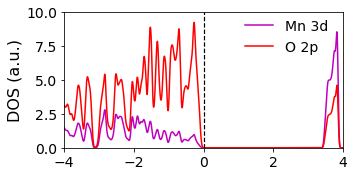

In [14]:
plt.figure(figsize=(5,3))
plt.xlim([-4, 4]); plt.ylim([-0, 10])
plt.ylabel("DOS (a.u.)", fontdict={'size': 16})
plt.plot(new_e, new_dos_Mn_d_dis, 'm')
plt.plot(new_e, new_dos_O_p_dis, 'r')
plt.plot([0, 0], [0, 10], "k--", linewidth=1.2)
plt.legend(["Mn 3d", "O 2p"], loc=(0.63, 0.65), frameon=False)
plt.gcf().subplots_adjust(bottom=0.25)
# plt.savefig("li2mno3.png", dpi=300, bbox_inches="tight")

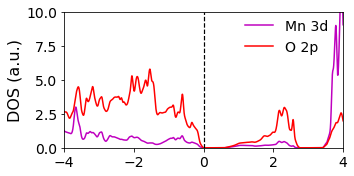

In [15]:
plt.figure(figsize=(5,3))
plt.xlim([-4, 4]); plt.ylim([-0, 10])
plt.ylabel("DOS (a.u.)", fontdict={'size': 16})
plt.plot(new_e, new_dos_Mn_d_chg, 'm')
plt.plot(new_e, new_dos_O_p_chg, 'r')
plt.plot([0, 0], [0, 10], "k--", linewidth=1.2)
plt.legend(["Mn 3d", "O 2p"], loc=(0.63, 0.65), frameon=False)
plt.gcf().subplots_adjust(bottom=0.25)
# plt.savefig("li2mno3_charged.png", dpi=300, bbox_inches="tight")